In [1]:
ORGDATADIR = './UrbanSound8K'
DATADIR =  './16kmono_UrbanSound8K'
# Data Loading
import os
import re
from glob import glob
import librosa
import numpy as np
np.warnings.filterwarnings('ignore')

all_files = glob(os.path.join(ORGDATADIR, 'audio/*/*wav'))

In [2]:
print(os.path.dirname(all_files[0].replace(ORGDATADIR, DATADIR)), all_files[0].replace(ORGDATADIR, DATADIR))

./16kmono_UrbanSound8K/audio/fold1 ./16kmono_UrbanSound8K/audio/fold1/164053-8-2-3.wav


In [3]:
sample_rate = 16000
def librosa_load_audio_as_mono(pathname, samplerate=sample_rate, ms_duration=None):
    _path = pathname
    if ms_duration != None:
        y, sr = librosa.load(_path, sr=samplerate, duration=ms_duration/1e3)
    else:
        y, sr = librosa.load(_path, sr=samplerate)

    y_mono = librosa.to_mono(y)
    raw = np.array(list(y_mono), dtype=np.float32)
    return raw

def write_audio(pathname, audio, samplerate):
    maxv = np.iinfo(np.int16).max
    librosa.output.write_wav(pathname, (audio * maxv).astype(np.int16), samplerate)

def ensure_folder(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [4]:
for f in all_files:
    a = librosa_load_audio_as_mono(f)
    targ = f.replace(ORGDATADIR, DATADIR)
    ensure_folder(os.path.dirname(targ))
    write_audio(targ, a, sample_rate)

# Creating on-memory data

In [4]:
# list of all unified format files.
all_unifiles = [f.replace(ORGDATADIR, DATADIR) for f in all_files]

In [5]:
import librosa
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as display

AUDIO_SR = 16000

In [6]:
def tf_wave_to_melspectrogram(wave, sr):
    spectrogram = librosa.feature.melspectrogram(wave, sr=sr, n_mels=40, hop_length=160, n_fft=480, fmin=20, fmax=4000)
    spectrogram = librosa.power_to_db(spectrogram)
    spectrogram = spectrogram.astype(np.float32)
    return spectrogram

def show_melspectrogram(mels):
    librosa.display.specshow(mels, y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log-frequency power spectrogram')

def wave_padding(data, sr, minimum_sec):
    min_data_size = int(np.ceil(sr * minimum_sec))

    if len(data) < min_data_size:
        L = abs(len(data) - min_data_size)
        start = L // 2
        data  = np.pad(data, (start, L-start), 'constant')
    return data

def wavfile_to_melspectrogram(filename, minimum_sec=1., debug_display=False):
    x, sr = librosa.load(filename)
    x = wave_padding(x, sr, minimum_sec)
    mels = tf_wave_to_melspectrogram(x, sr)
    if debug_display:
        display.display(display.Audio(x, rate=sr))
        show_melspectrogram(mels)
        plt.title(filename)
        plt.show()
    return mels

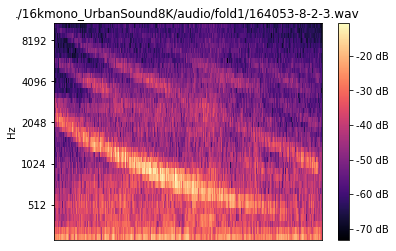

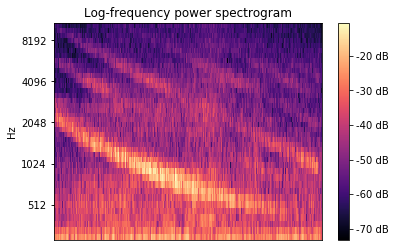

In [10]:
x, sr = librosa.load(all_unifiles[1])
mels = wavfile_to_melspectrogram(all_unifiles[0], debug_display=True)
display.display(display.Audio(mels, rate=sr))
mels2 = mels_get_len_unified(mels, uni_length)
show_melspectrogram(mels2)

In [10]:
import pandas as pd

traindata = pd.read_csv(os.path.join('.', 'train_list.csv'))
valdata = pd.read_csv(os.path.join('.', 'validation_list.csv'))
trainset_fname = [(int(traindata.classID[k]), os.path.join(DATADIR, 'audio/fold%d/%s' % (traindata.fold[k], traindata.slice_file_name[k])))
            for k in range(len(traindata))]
valset_fname = [(int(valdata.classID[k]), os.path.join(DATADIR, 'audio/fold%d/%s' % (valdata.fold[k], valdata.slice_file_name[k])))
          for k in range(len(valdata))]

In [31]:
X_train = [wavfile_to_melspectrogram(train[1]) for train in trainset_fname]
y_train = np.array([train[0] for train in trainset_fname])

In [78]:
for x in X_train:
    print(x.shape)

(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 345)
(40, 282)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)


(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)
(40, 552)


In [11]:
X_valid = [wavfile_to_melspectrogram(valid[1]) for valid in valset_fname]
y_valid = np.array([valid[0] for valid in valset_fname])

In [9]:
from scipy import stats

def mels_get_len_unified(data, uni_length):
    d_len = data.shape[1]
    if d_len < uni_length:
        L = abs(d_len - uni_length)
        dd  = np.pad(data, ((0, 0), (0, L)), 'symmetric')
    elif uni_length < d_len:
        dd = data[:, :uni_length]
    else:
        dd = data
    return dd

uni_length = stats.mode([x.shape[1] for x in X_valid])[0][0] # mode value
#data = mels_get_len_unified(X_valid[0][:, :200], data_length)
#print(data.shape, data_length)
#show_melspectrogram(data)

In [39]:
X_train = np.array([mels_get_len_unified(x, uni_length) for x in X_train])
X_valid = np.array([mels_get_len_unified(x, uni_length) for x in X_valid])

In [40]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_valid.npy', X_valid)
np.save('y_valid.npy', y_valid)

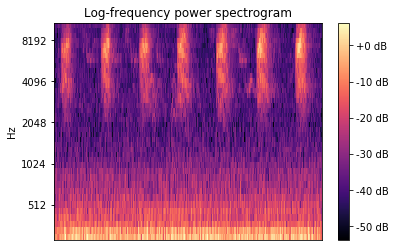

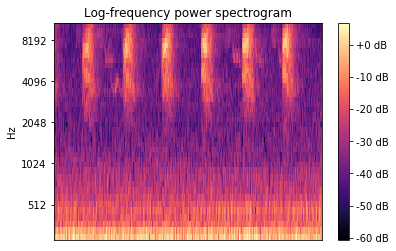

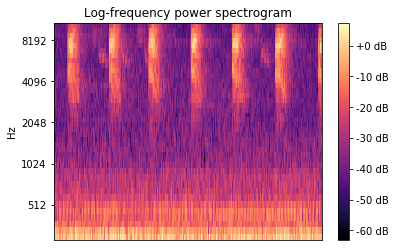

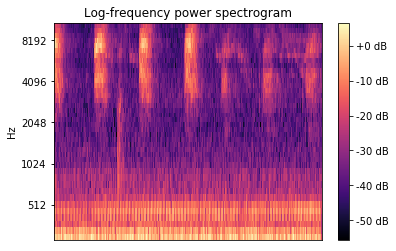

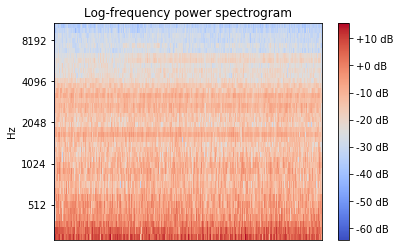

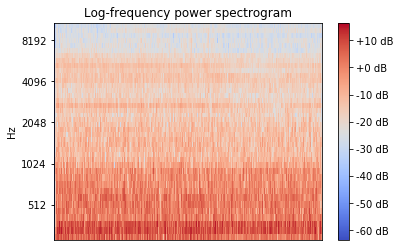

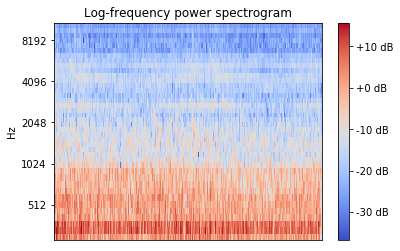

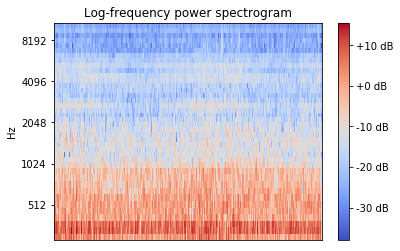

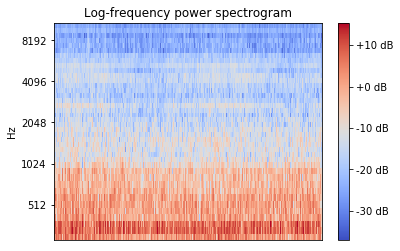

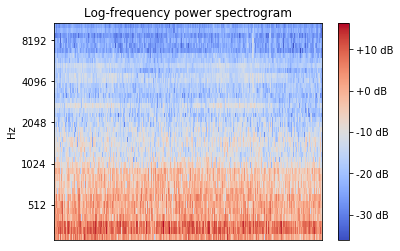

In [41]:
for mels in X_valid[:10]:
    show_melspectrogram(mels)
    plt.show()

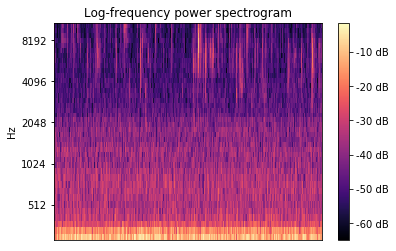

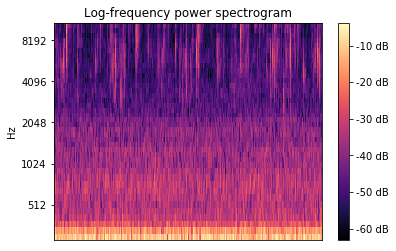

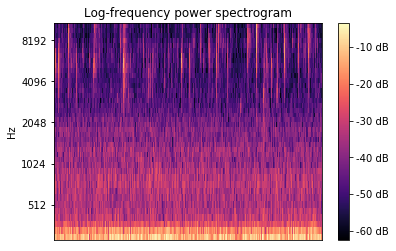

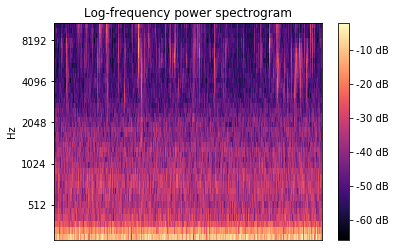

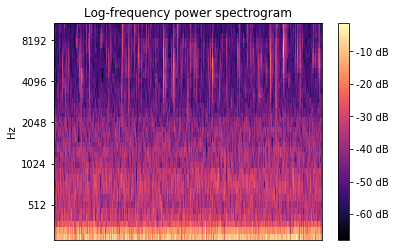

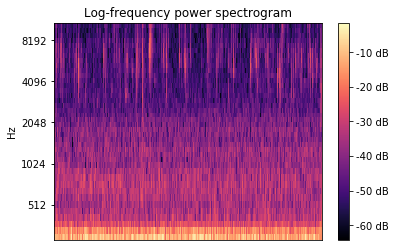

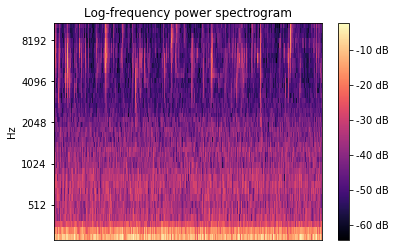

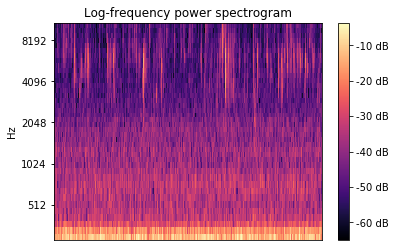

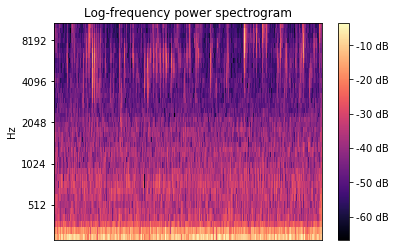

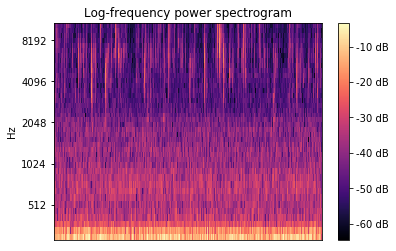

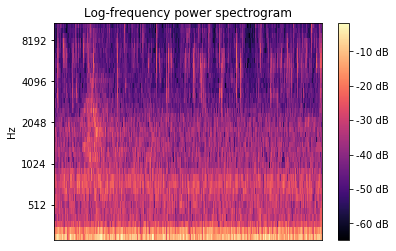

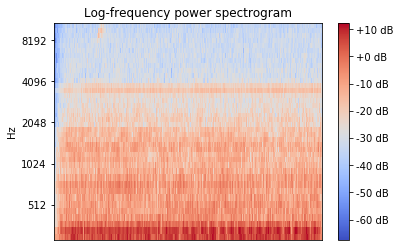

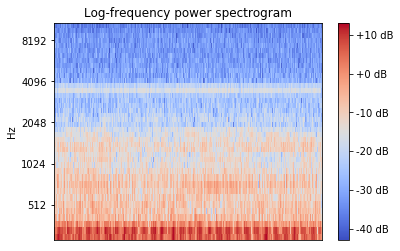

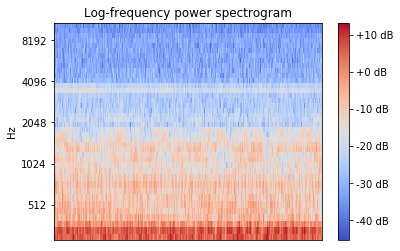

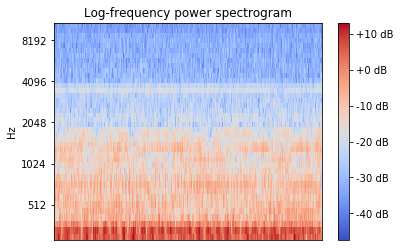

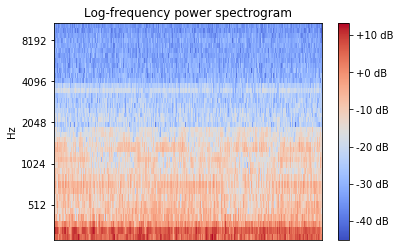

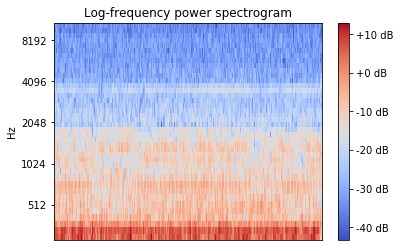

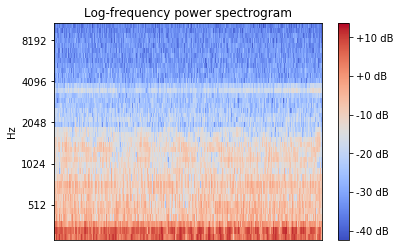

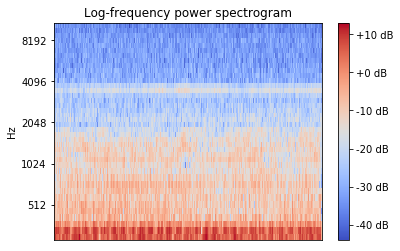

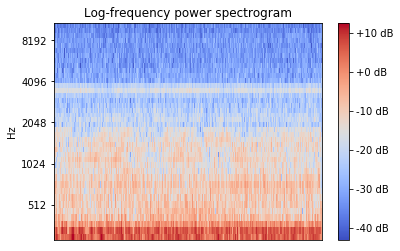

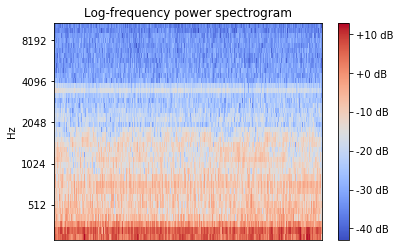

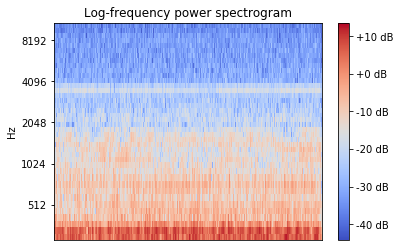

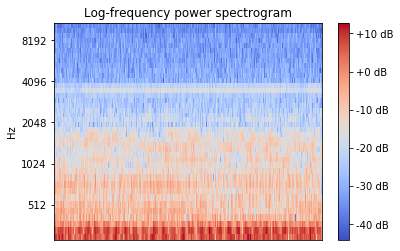

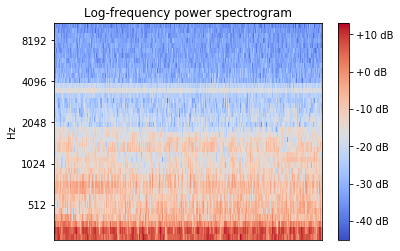

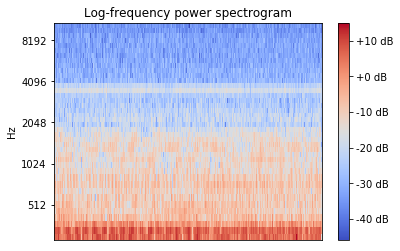

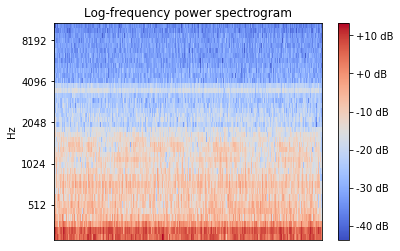

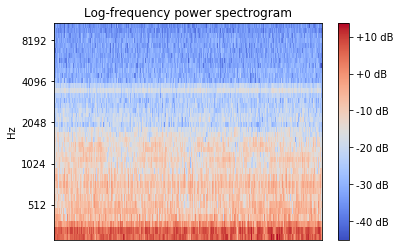

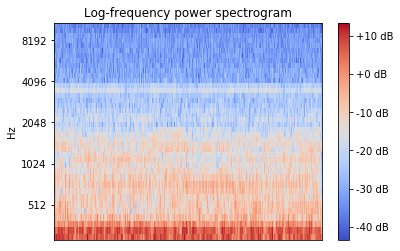

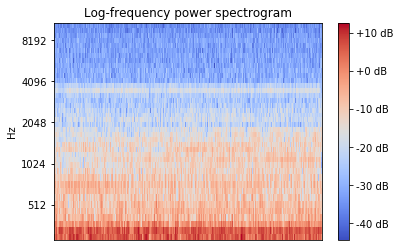

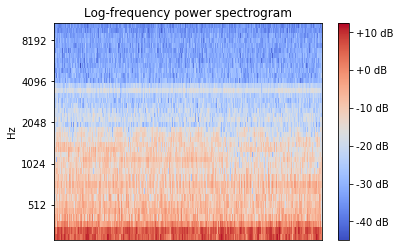

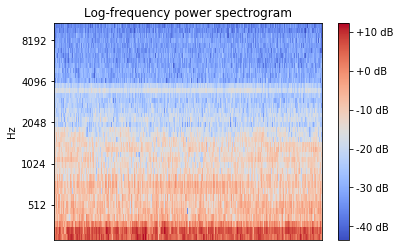

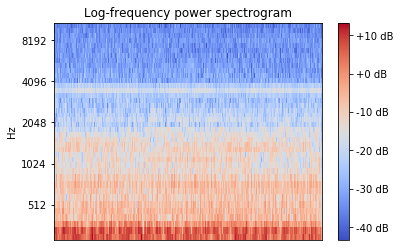

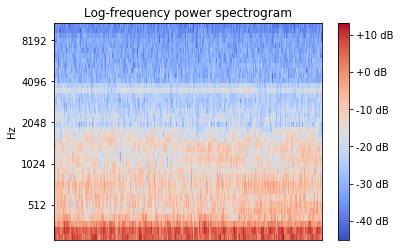

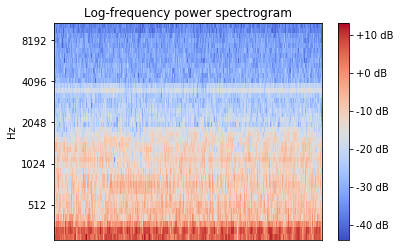

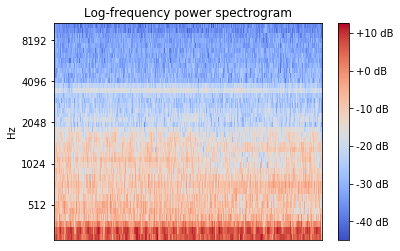

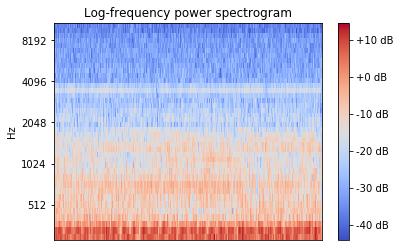

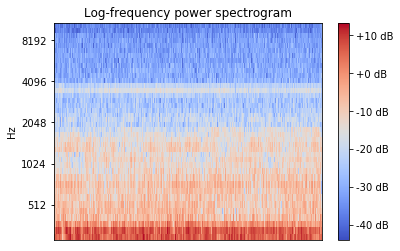

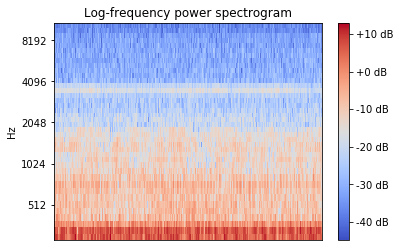

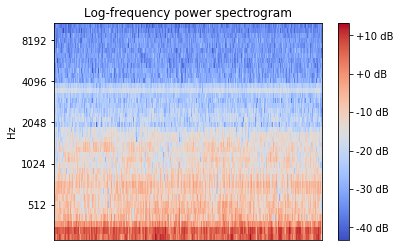

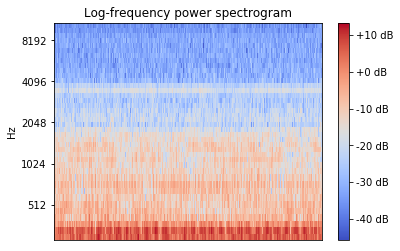

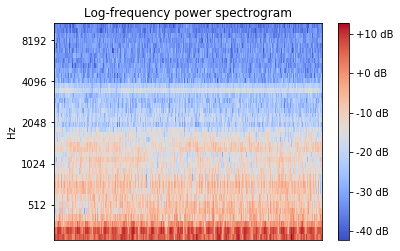

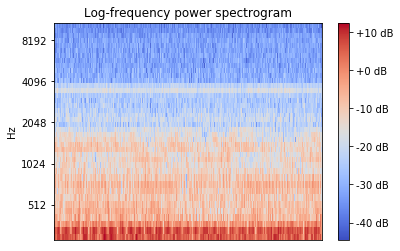

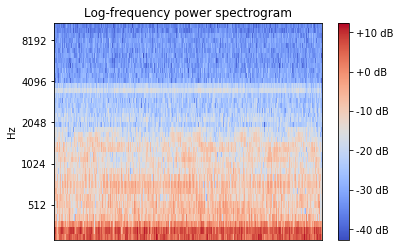

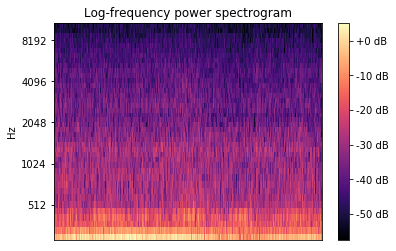

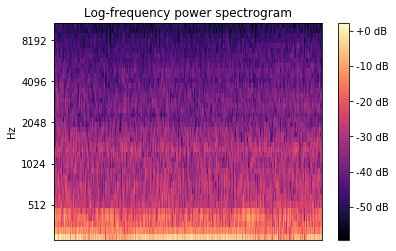

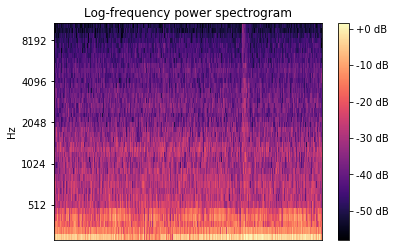

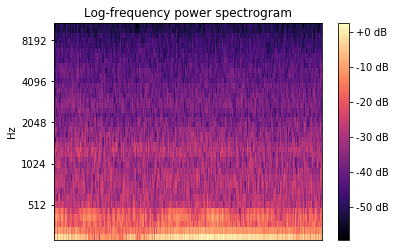

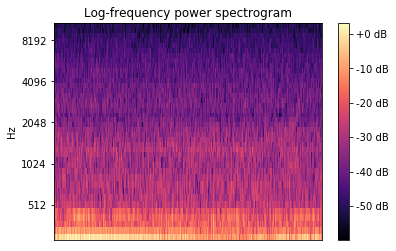

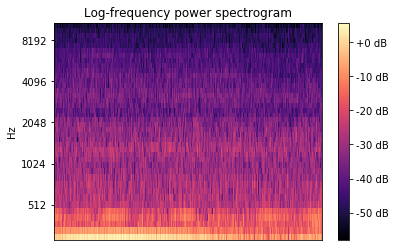

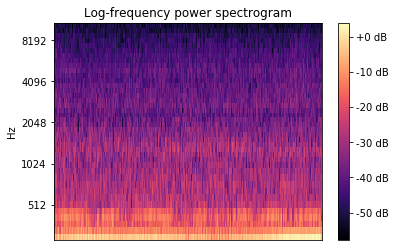

In [49]:
n = 50
start = 200
for mels in X_train[start:start + n]:
    show_melspectrogram(mels)
    plt.show()

In [8]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_valid = np.load('X_valid.npy')
y_valid = np.load('y_valid.npy')
